In [1]:
# Load essential libraries
import pandas as pd
import numpy as np

# Load the preprocessed data
df = pd.read_csv('../data/processed/train_engineered.csv')
df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,discount,discount_pct,any_promo,meal_popularity,center_popularity
0,1379560,1,55,1885,136.83,152.29,0,0,177,15.46,0.101517,0,752.456365,163.475709
1,1466964,1,55,1993,136.83,135.83,0,0,270,-1.00,-0.007362,0,598.853544,163.475709
2,1346989,1,55,2539,134.86,135.86,0,0,189,1.00,0.007361,0,309.494594,163.475709
3,1338232,1,55,2139,339.50,437.53,0,0,54,98.03,0.224053,0,42.813462,163.475709
4,1448490,1,55,2631,243.50,242.50,0,0,40,-1.00,-0.004124,0,104.239051,163.475709


### Import ML Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


### Define Features and Target

In [3]:
features = [
    'center_id', 'meal_id', 'checkout_price', 'base_price',
    'emailer_for_promotion', 'homepage_featured',
    'discount', 'discount_pct', 'any_promo',
    'meal_popularity', 'center_popularity'
]

X = df[features]
y = df['num_orders']


### Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Train Random Forest Model

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Make Predictions

In [6]:
y_pred = model.predict(X_test)


### Evaluate Model

In [7]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 77.41
RMSE: 161.76
R² Score: 0.83


### Feature Importance Plot

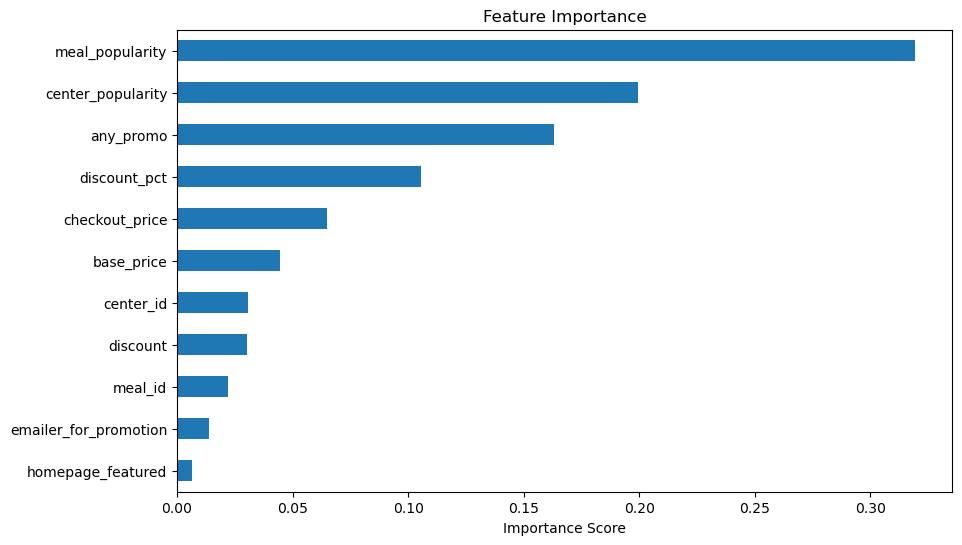

In [8]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [9]:
pip install xgboost lightgbm


DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/jsonpointer-3.0.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [9]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [10]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)


In [11]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print("🔷 XGBoost Results")
print(f"MAE: {xgb_mae:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R² Score: {xgb_r2:.2f}")


🔷 XGBoost Results
MAE: 88.44
RMSE: 173.79
R² Score: 0.80


In [12]:
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 365238, number of used features: 11
[LightGBM] [Info] Start training from score 262.004249


In [13]:
lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
lgb_r2 = r2_score(y_test, lgb_pred)

print("🟢 LightGBM Results")
print(f"MAE: {lgb_mae:.2f}")
print(f"RMSE: {lgb_rmse:.2f}")
print(f"R² Score: {lgb_r2:.2f}")


🟢 LightGBM Results
MAE: 91.15
RMSE: 177.33
R² Score: 0.79


In [14]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'MAE': [mae, xgb_mae, lgb_mae],
    'RMSE': [rmse, xgb_rmse, lgb_rmse],
    'R2 Score': [r2, xgb_r2, lgb_r2]
})

results.sort_values(by='RMSE', ascending=True)


,Model,MAE,RMSE,R2 Score
0,Random Forest,77.414832,161.756857,0.828462
1,XGBoost,88.440772,173.793542,0.801983
2,LightGBM,91.148702,177.330923,0.793840


In [15]:
pip install scikit-learn xgboost


DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/jsonpointer-3.0.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [17]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10, None],
    'min_samples_split': [2, 5]
}


In [18]:
rf = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .max_depth=6, min_samples_split=2, n_estimators=100; total time=  51.1s
[CV] END .max_depth=6, min_samples_split=5, n_estimators=200; total time= 1.8min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time= 2.8min
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time= 4.2min
[CV] END .max_depth=6, min_samples_split=2, n_estimators=100; total time=  50.6s
[CV] END .max_depth=6, min_samples_split=5, n_estimators=100; total time=  54.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time= 2.8min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 2.7min
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time= 4.0min
[CV] END .max_depth=6, min_samples_split=2, n_estimators=200; total time= 1.7min
[CV] END max_depth=10, min_samples_split=2

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 10, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

[CV] END .max_depth=6, min_samples_split=2, n_estimators=100; total time=  51.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time= 2.8min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 5.1min
[CV] END .max_depth=6, min_samples_split=2, n_estimators=200; total time= 1.7min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time= 2.7min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 4.8min


In [19]:
print("✅ Best Params:", rf_grid.best_params_)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("📊 Tuned Random Forest")
print(f"MAE: {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")


✅ Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
📊 Tuned Random Forest
MAE: 76.26
RMSE: 160.33
R² Score: 0.83


In [20]:
from xgboost import XGBRegressor

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}


In [21]:
xgb = XGBRegressor(random_state=42)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [4, 6],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   3.8s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=1.0; total time=   4.7s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   3.9s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=1.0; total time=   4.6s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subs

In [22]:
print("✅ Best Params:", xgb_grid.best_params_)

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("📊 Tuned XGBoost")
print(f"MAE: {xgb_mae:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R² Score: {xgb_r2:.2f}")


✅ Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
📊 Tuned XGBoost
MAE: 83.94
RMSE: 166.50
R² Score: 0.82


In [24]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Store metrics from each model
model_results = pd.DataFrame({
    'Model': [
        'Random Forest (baseline)',
        'XGBoost (baseline)',
        'LightGBM (baseline)',
        'Random Forest (tuned)',
        'XGBoost (tuned)'
    ],
    'MAE': [
        77.41,
        88.44,
        91.15,
        76.26,
        83.94
    ],
    'RMSE': [
        161.76,
        173.79,
        177.33,
        160.33,
        166.50
    ],
    'R2 Score': [
        0.83,
        0.80,
        0.79,
        0.83,
        0.82
    ]
})

# Sort by RMSE
model_results = model_results.sort_values(by='RMSE')
model_results.reset_index(drop=True, inplace=True)
model_results


,Model,MAE,RMSE,R2 Score
0,Random Forest (tuned),76.26,160.33,0.83
1,Random Forest (baseline),77.41,161.76,0.83
2,XGBoost (tuned),83.94,166.50,0.82
3,XGBoost (baseline),88.44,173.79,0.80
4,LightGBM (baseline),91.15,177.33,0.79


In [25]:
import joblib

# Save model to the models/ folder
joblib.dump(best_rf, '../models/rf_demand_forecast_tuned.pkl')

print("✅ Tuned Random Forest model saved successfully!")


✅ Tuned Random Forest model saved successfully!
